In [3]:
import os
import cv2

# Input and output paths
input_path = r"C:\Users\surut\Downloads\jaundice_dataset"
output_path = r'C:\Users\surut\Downloads\processed_dataset'

# Desired image size
IMG_SIZE = 128

# Create output directories if not exist
for label_name in ['normal', 'jaundice']:
    save_folder = os.path.join(output_path, label_name)
    os.makedirs(save_folder, exist_ok=True)

# Process and save color images
for label_name in os.listdir(input_path):
    label_folder = os.path.join(input_path, label_name)
    if not os.path.isdir(label_folder):
        continue
    
    for idx, filename in enumerate(os.listdir(label_folder)):
        img_path = os.path.join(label_folder, filename)
        img = cv2.imread(img_path)  # Reads in BGR format
        if img is None:
            continue
        
        # Resize (keep color)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        
        # Save the image in the corresponding folder
        save_path = os.path.join(output_path, label_name, f"{label_name}_{idx}.png")
        cv2.imwrite(save_path, img)

print("✅ All color images processed and saved to 'processed_dataset/'")


✅ All color images processed and saved to 'processed_dataset/'


Total images loaded: 64
Shape of data: (64, 128, 128, 3)
Shape of labels: (64,)


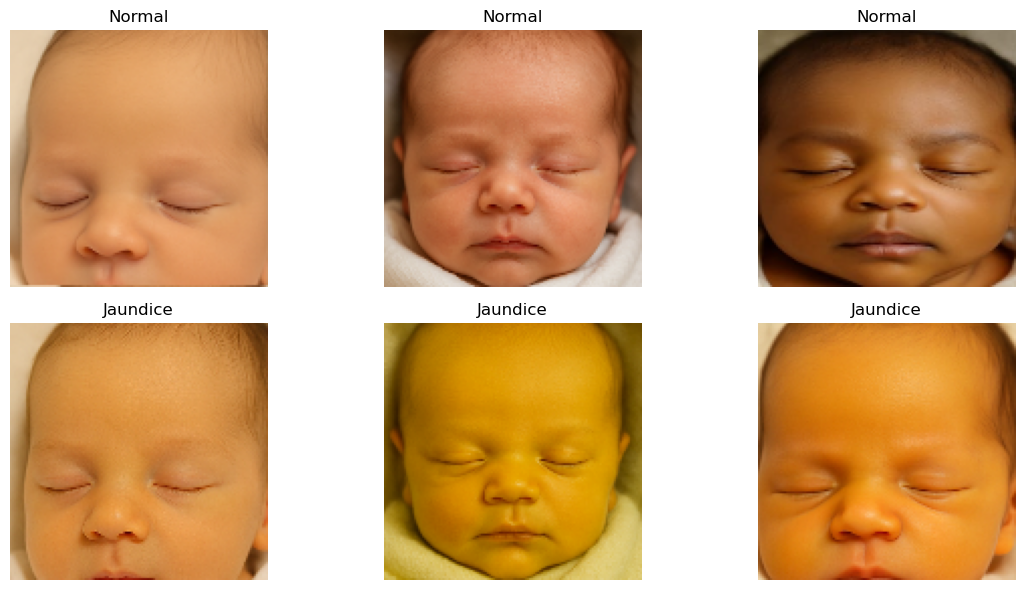

In [23]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths and constants
output_path = r'C:\Users\surut\Downloads\processed_dataset'
IMG_SIZE = 128

# Label map
label_map = {'normal': 0, 'jaundice': 1}
data = []
labels = []

# Explicitly loop through both labels and load images
for label_name in ['normal', 'jaundice']:
    folder_path = os.path.join(output_path, label_name)
    label = label_map[label_name]
    
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
        data.append(img)
        labels.append(label)

# Convert to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Print dataset info
print("Total images loaded:", len(data))
print("Shape of data:", data.shape)
print("Shape of labels:", labels.shape)

# Select 3 jaundice and 3 normal images for display
normal_images = [data[i] for i in range(len(data)) if labels[i] == 0][:3]
jaundice_images = [data[i] for i in range(len(data)) if labels[i] == 1][:3]

# Create a single figure with 2 rows, each containing 3 images
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

# Display normal images (row 1)
for i, img in enumerate(normal_images):
    axs[0, i].imshow(img)
    axs[0, i].set_title("Normal")
    axs[0, i].axis('off')

# Display jaundice images (row 2)
for i, img in enumerate(jaundice_images):
    axs[1, i].imshow(img)
    axs[1, i].set_title("Jaundice")
    axs[1, i].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Set directories
original_data_dir = r"C:\Users\surut\Downloads\processed_dataset"
augmented_data_dir = r'C:\Users\surut\Downloads\augmented_jaundice_dataset'

# Create augmented dataset directories
os.makedirs(augmented_data_dir, exist_ok=True)
for class_name in ['jaundice', 'normal']:
    os.makedirs(os.path.join(augmented_data_dir, class_name), exist_ok=True)

# ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=25,              # Random rotation
    width_shift_range=0.15,         # Random width shift
    height_shift_range=0.15,        # Random height shift
    shear_range=0.2,                # Random shear
    zoom_range=0.2,                 # Random zoom
    horizontal_flip=True,           # Random horizontal flip
    brightness_range=[0.8, 1.2],    # Random brightness change
    fill_mode='nearest'             # Fill in missing pixels with the nearest pixel
)

# Number of augmented images to generate per original image
num_to_generate = 20  

# Generate augmented images
for class_name in ['jaundice', 'normal']:
    input_folder = os.path.join(original_data_dir, class_name)
    output_folder = os.path.join(augmented_data_dir, class_name)

    for fname in os.listdir(input_folder):
        if not fname.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
            continue

        img_path = os.path.join(input_folder, fname)
        img = load_img(img_path)  # Load image
        x = img_to_array(img)  # Convert to array
        x = x.reshape((1,) + x.shape)  # Reshape for generator

        prefix = os.path.splitext(fname)[0]  # Get filename without extension
        i = 0

        # Augment and save images
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir=output_folder,
                                  save_prefix=prefix,
                                  save_format='jpeg'):
            i += 1
            if i >= num_to_generate:  # Stop after generating 'num_to_generate' images
                break

print("✅ Image augmentation completed. Augmented images saved in 'augmented_jaundice_dataset/'")

✅ Image augmentation completed. Augmented images saved in 'augmented_jaundice_dataset/'


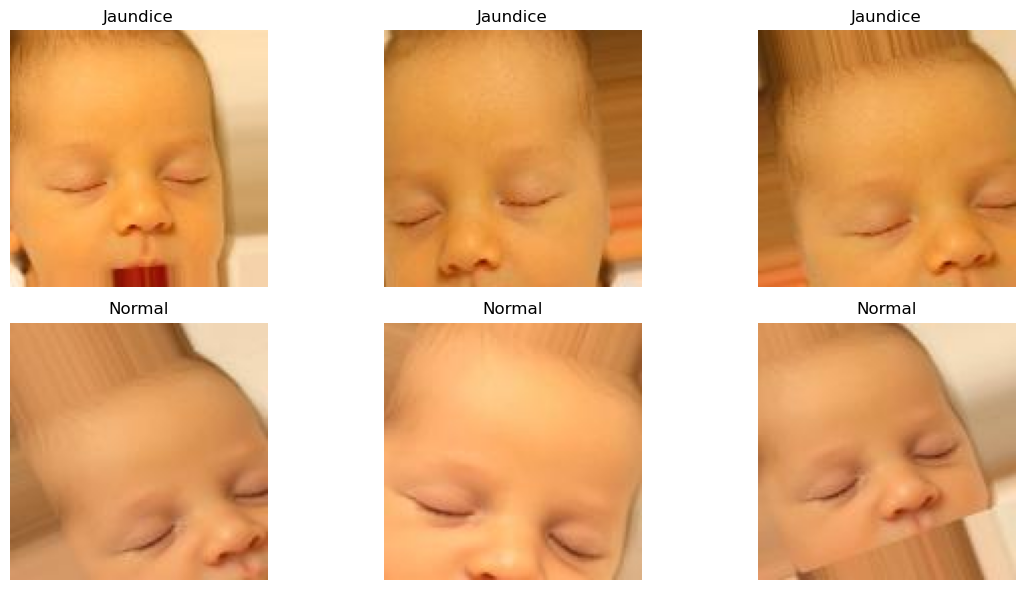

In [29]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set directories
augmented_data_dir = r'C:\Users\surut\Downloads\augmented_jaundice_dataset'

# Label names for the subfolders
class_names = ['jaundice', 'normal']

# Number of images to show from each class
num_images_to_show = 3  # Display 3 images from each class

# Create a figure with subplots (2 rows, 3 columns)
fig, axs = plt.subplots(2, num_images_to_show, figsize=(12, 6))

# Loop through each class and display augmented images
for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(augmented_data_dir, class_name)
    
    # List the augmented images in the folder
    augmented_images = [f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Display the first 'num_images_to_show' augmented images
    for i in range(num_images_to_show):
        img_path = os.path.join(class_folder, augmented_images[i])
        img = cv2.imread(img_path)  # Read image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for display
        
        axs[class_idx, i].imshow(img)  # Display image
        axs[class_idx, i].set_title(class_name.capitalize())  # Title with class name
        axs[class_idx, i].axis('off')  # Hide axes

# Show the plot with all the images
plt.tight_layout()
plt.show()

In [57]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def unet_classifier(input_size=(128, 128, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = MaxPooling2D()(c1)

    c2 = Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = MaxPooling2D()(c2)

    c3 = Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = MaxPooling2D()(c3)

  
    c4 = Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = Conv2D(512, 3, activation='relu', padding='same')(c4)

    # Decoder
    
    u5 = UpSampling2D()(c4)
    u5 = concatenate([u5, c3])
    c5 = Conv2D(256, 3, activation='relu', padding='same')(u5)
    c5 = Conv2D(256, 3, activation='relu', padding='same')(c5)

    u6 = UpSampling2D()(c5)
    u6 = concatenate([u6, c2])
    c6 = Conv2D(128, 3, activation='relu', padding='same')(u6)
    c6 = Conv2D(128, 3, activation='relu', padding='same')(c6)

    u7 = UpSampling2D()(c6)
    u7 = concatenate([u7, c1])
    c7 = Conv2D(64, 3, activation='relu', padding='same')(u7)
    c7 = Conv2D(64, 3, activation='relu', padding='same')(c7)

    # Classification Head
    x = GlobalAveragePooling2D()(c7)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model

In [59]:
model = unet_classifier()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 128, 128, 64)      │           1,792 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 128, 128, 64)      │          36,928 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 64, 64, 64)        │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 64, 64, 128)       │          73,856 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 64, 64, 128)       │         147,584 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 32, 32, 128)       │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 32, 32, 256)       │         295,168 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 32, 32, 256)       │         590,080 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 16, 16, 256)       │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 16, 16, 512)       │       1,180,160 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 16, 16, 512)       │       2,359,808 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d (UpSampling2D)  │ (None, 32, 32, 512)       │               0 │ conv2d_7[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 32, 32, 768)       │               0 │ up_sampling2d[0][0],       │
│                               │                           │                 │ conv2d_5[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 32, 32, 256)       │       1,769,728 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 32, 32, 256)       │         590,08

 Total params: 7,787,073 (29.71 MB)

 Trainable params: 7,787,073 (29.71 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    r'C:\Users\surut\Downloads\augmented_jaundice_dataset',
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    r'C:\Users\surut\Downloads\augmented_jaundice_dataset',
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)


Found 1024 images belonging to 2 classes.
Found 255 images belonging to 2 classes.


In [71]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',    # Metric to monitor ('val_loss' or 'val_accuracy')
    patience=5,            # Number of epochs to wait for improvement
    verbose=1,             # Print messages when early stopping triggers
    restore_best_weights=True  # Restore model weights from the best epoch
)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,  # Set the number of epochs, but training will stop early if necessary
    callbacks=[early_stopping]  # Include the early stopping callback
)

Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 507s 8s/step - accuracy: 0.6856 - loss: 0.6170 - val_accuracy: 0.8118 - val_loss: 0.3158
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 324s 5s/step - accuracy: 0.8678 - loss: 0.3217 - val_accuracy: 0.9373 - val_loss: 0.1889
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 314s 5s/step - accuracy: 0.9042 - loss: 0.2436 - val_accuracy: 0.8627 - val_loss: 0.2392
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 309s 5s/step - accuracy: 0.9224 - loss: 0.1909 - val_accuracy: 0.8980 - val_loss: 0.1879
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 306s 5s/step - accuracy: 0.9280 - loss: 0.1730 - val_accuracy: 0.8784 - val_loss: 0.3631
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 302s 5s/step - accuracy: 0.9238 - loss: 0.1762 - val_accuracy: 0.9059 - val_loss: 0.1362
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 308s 5s/step - accuracy: 0.9323 - loss: 0.1432 - val_accuracy: 0.8588 - val_loss: 0.3337
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 303s 5s/step - accuracy: 0.9614 - loss: 0.0986 - val_accuracy: 0.8627 - v

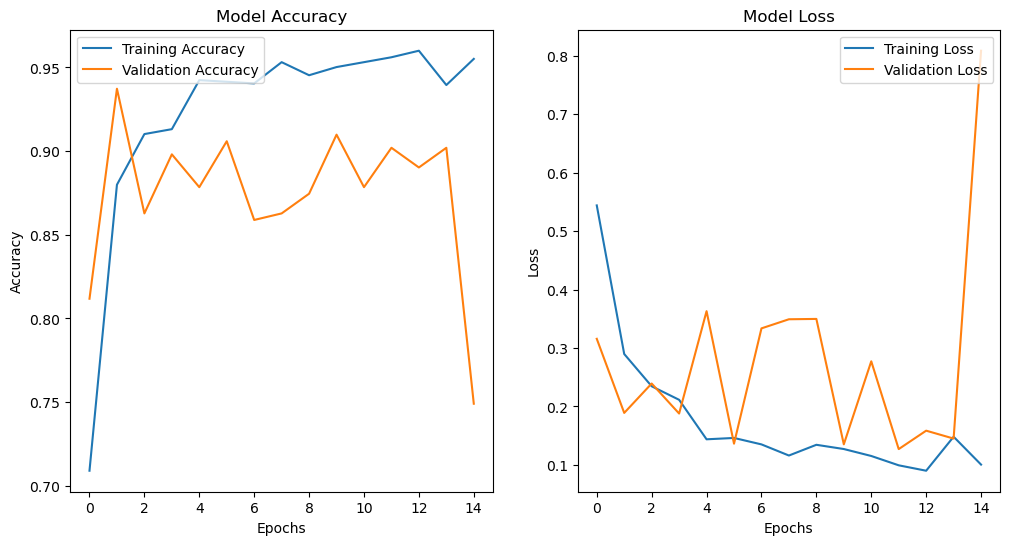

In [73]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [91]:
model.save("unet_jaundice_classifier.keras")

In [93]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("unet_jaundice_classifier.keras")

In [83]:
import cv2
import numpy as np

def preprocess_image(image_path, target_size=(128, 128)):
    img = cv2.imread(image_path)  # Reads in BGR format
    img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = img.astype("float32") / 255.0         # Normalize
    img = np.expand_dims(img, axis=0)           # Add batch dimension
    return img

In [194]:
def predict_jaundice(image_path, model):
    processed_img = preprocess_image(image_path)
    prediction = model.predict(processed_img)[0][0]
    print(prediction)

    if prediction >= 0.5:
        print("🟢 Prediction: Normal (Probability: {:.2f})".format(1 - prediction))
    else:
        print("🟡 Prediction: Jaundice Detected (Probability: {:.2f})".format(prediction))
        
        
model = load_model("unet_jaundice_classifier.keras")
image_path = r"C:\Users\surut\Downloads\jaundice_dataset\normal\normal5.png"
predict_jaundice(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
0.9989789
🟢 Prediction: Normal (Probability: 0.00)


In [199]:
loss, accuracy = model.evaluate(train_gen)
print("✅ Test Accuracy: {:.2f}%".format(accuracy * 100))

64/64 ━━━━━━━━━━━━━━━━━━━━ 219s 3s/step - accuracy: 0.9613 - loss: 0.1045
✅ Test Accuracy: 96.29%


In [8]:
import os
import tensorflow as tf

model = tf.keras.models.load_model('unet_jaundice_classifier.keras')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save to Desktop
save_dir = os.path.expanduser(r"C:\Users\surut\OneDrive\Desktop")
tflite_path = os.path.join(save_dir, 'unet_jaundice_classifier.tflite')

with open(tflite_path, 'wb') as f:
    f.write(tflite_model)

print(f"TFLite model saved to: {tflite_path}")

C:\Users\surut\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 66 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


INFO:tensorflow:Assets written to: C:\Users\surut\AppData\Local\Temp\tmp22mo4j53\assets


INFO:tensorflow:Assets written to: C:\Users\surut\AppData\Local\Temp\tmp22mo4j53\assets


Saved artifact at 'C:\Users\surut\AppData\Local\Temp\tmp22mo4j53'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2532850167504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532850168656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532850169232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532850170384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532850169808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532850171152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532850170576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532850171536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532850170000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532850168464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532